<a href="https://colab.research.google.com/github/gannannavelorange/Project/blob/master/src/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!git clone https://github.com/gannannavelorange/Project

Cloning into 'Project'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [59]:
cd Project/src

/content/Project/src


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy.stats import norm
import csv


In [42]:
def gbs(option_type, fs, x, t, r, b, v):
    t__sqrt = math.sqrt(t)
    d1 = (math.log(fs / x) + (b + (v * v) / 2) * t) / (v * t__sqrt)
    d2 = d1 - v * t__sqrt

    #if option_type == "c":
    if option_type == 1:
        # it's a call
        #_debug("     Call Option")
        value = fs * math.exp((b - r) * t) * norm.cdf(d1) - x * math.exp(-r * t) * norm.cdf(d2)
        delta = math.exp((b - r) * t) * norm.cdf(d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) - (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(d1) - r * x * math.exp(-r * t) * norm.cdf(d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = x * t * math.exp(-r * t) * norm.cdf(d2)
    else:
        # it's a put
        #_debug("     Put Option")
        value = x * math.exp(-r * t) * norm.cdf(-d2) - (fs * math.exp((b - r) * t) * norm.cdf(-d1))
        delta = -math.exp((b - r) * t) * norm.cdf(-d1)
        gamma = math.exp((b - r) * t) * norm.pdf(d1) / (fs * v * t__sqrt)
        theta = -(fs * v * math.exp((b - r) * t) * norm.pdf(d1)) / (2 * t__sqrt) + (b - r) * fs * math.exp(
            (b - r) * t) * norm.cdf(-d1) + r * x * math.exp(-r * t) * norm.cdf(-d2)
        vega = math.exp((b - r) * t) * fs * t__sqrt * norm.pdf(d1)
        rho = -x * t * math.exp(-r * t) * norm.cdf(-d2)

    #_debug("     d1= {0}\n     d2 = {1}".format(d1, d2))
    #_debug("     delta = {0}\n     gamma = {1}\n     theta = {2}\n     vega = {3}\n     rho={4}".format(delta, gamma,theta, vega,theta, vega,
                                                        
    
    return value, delta, gamma, theta, vega, rho

In [43]:
#a=gbs("c", 2900, 2900,0.39285, 0.025, 0, 0.136015)
a=gbs(1, 2900, 2900,0.39285, 0.025, 0, 0.136015)
print(a)

(97.63632742298137, 0.5119472600430428, 0.0015964378845164623, -121.75052449780648, 717.4003503976213, 544.8871639848188)


In [70]:
aa=gbs(1, 2900,3300,0.39285, 0.025, 0, 0.098)[0]

print(aa)

1.2045960475401145


In [32]:
#ATM volatility
def init_vol(t,C,F):
  v=2/math.sqrt(t)*norm.ppf(1/2*(C/F+1))
  return v

In [33]:
# Call price=98.6 Future price=2900
ATMvol=init_vol(0.39285,98.6,2900)
print(ATMvol)

0.1360150517495224


In [63]:
def getdata():
  with open('Data.csv') as file:
      reader=csv.reader(file)
      rows=[row for row in reader]
      col0=[row[0] for row in rows[1:42]]
      col0=[float(c) for c in col0] # Strike
      col1=[row[1] for row in rows[1:42]]
      col1=[float(c) for c in col1] # Call price
      col2=[row[1] for row in rows[1:42]]
      col2=[float(c) for c in col2] # Put price
      
  return col0,col1,col2

In [66]:
d=getdata()[1]
print(d)

[406.82, 389.14, 370.39, 354.36, 335.09, 319.47, 301.22, 282.38, 264.64, 248.01, 232.3, 219.94, 203.18, 185.46, 168.64, 156.89, 145.87, 137.2, 117.19, 106.6, 98.6, 83.45, 78.15, 64.53, 57.96, 50.9, 45.17, 42.2, 35.41, 29.19, 23.69, 21.39, 15.56, 12.28, 8.97, 7.34, 5.43, 4.01, 3.4, 2.14, 1.25]


In [54]:
#define an error function
def error_function(v,option_type, fs, x, t, r, b,theo_price):
  #gbm.vol_ratio = vol
  gbs_price=gbs(option_type, fs, x, t, r, b, v)
  return np.abs(theo_price - gbs_price[0])   #x is the x[i]

In [55]:
def implied_volatility(option_type, fs, x, t, r, b,theo_price):
  intial =ATMvol#initial guess
  return so.fmin(error_function, intial, args = (option_type, fs, x, t, r, b,theo_price), disp = 0)[0]

No handles with labels found to put in legend.


[0.17062898963219053, 0.17132218157683682, 0.16755902099590064, 0.17165175906429142, 0.16540306952255157, 0.16851786733849522, 0.16412460773242543, 0.1580656120342205, 0.1542094724140024, 0.1522100079844448, 0.15133998983116412, 0.15573324943723393, 0.15131757524133727, 0.14483477776140546, 0.13940214532336304, 0.14127251831891768, 0.1432117954239402, 0.14756894263528883, 0.1347913811789731, 0.13472164689951166, 0.13735992713913556, 0.12913107462018902, 0.13374163122208058, 0.12570932144911606, 0.1267042801864318, 0.126084558286218, 0.12656398145751532, 0.1306222674711722, 0.1277038048587122, 0.12455538515802822, 0.12143062530216149, 0.12366461275490787, 0.11713532575533515, 0.114842396233044, 0.11080777006420442, 0.11062845334558932, 0.10815122608472155, 0.10617210082000683, 0.10733765949100493, 0.10301911518435812, 0.09853619721898078]


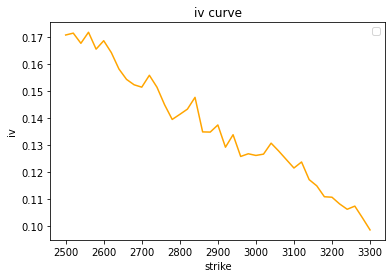

In [69]:
strike=getdata()[0]
callprice=getdata()[1]
outprice=getdata()[2]
iv=[]
for i in range(0,41):
  iv.append(implied_volatility(1,2900,strike[i],0.39285, 0.025, 0,callprice[i]))
  
print(iv)
#data2=data2.append(data3)

plt.plot(strike,iv,'orange')
plt.xlabel('strike')
plt.ylabel('iv')
plt.title('iv curve')
plt.legend()
plt.show()

In [57]:
i = implied_volatility(1, 2900, 2900,0.39285, 0.025, 0,98.6)
print(i)

0.13735992713913556


In [67]:
for i in range(0,5):
  print(i)

0
1
2
3
4
